<a href="https://colab.research.google.com/github/Teivak/FaceRecognitionProject/blob/main/Filtering_Recognition_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

landmarks = pd.read_csv('PROJECT/FaceAlignment/landmarks.csv', index_col='image_id')
landmarks.head()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
image_id,,,,,,,,,,
000001.jpg,165,184,244,176,196,249,194,271,266,260
000002.jpg,140,204,220,204,168,254,146,289,226,289
000003.jpg,244,104,264,105,263,121,235,134,251,140
000004.jpg,796,539,984,539,930,687,762,756,915,756
000005.jpg,273,169,328,161,298,172,283,208,323,207


In [ ]:
landmarks['avg_eye_x'] = (landmarks['lefteye_x'] + landmarks['righteye_x']) / 2
landmarks['avg_eye_y'] = (landmarks['lefteye_y'] + landmarks['righteye_y']) / 2

landmarks['avg_mouth_x'] = (landmarks['leftmouth_x'] + landmarks['rightmouth_x']) / 2
landmarks['avg_mouth_y'] = (landmarks['leftmouth_y'] + landmarks['rightmouth_y']) / 2

landmarks['face_center_x'] = (landmarks['avg_eye_x'] + landmarks['nose_x'] + landmarks['avg_mouth_x']) / 3
landmarks['face_center_y'] = (landmarks['avg_eye_y'] + landmarks['nose_y'] + landmarks['avg_mouth_y']) / 3

landmarks['face_width'] = landmarks[['righteye_x', 'rightmouth_x']].max(axis=1) - landmarks[['lefteye_x', 'leftmouth_x']].min(axis=1)
landmarks['face_height'] = landmarks['avg_mouth_y'] - landmarks['avg_eye_y']

landmarks.head()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,avg_eye_x,avg_eye_y,avg_mouth_x,avg_mouth_y,face_center_x,face_center_y,face_width,face_height
image_id,,,,,,,,,,,,,,,,,,
000001.jpg,165,184,244,176,196,249,194,271,266,260,204.5,180.0,230.0,265.5,210.166667,231.500000,101,85.5
000002.jpg,140,204,220,204,168,254,146,289,226,289,180.0,204.0,186.0,289.0,178.000000,249.000000,86,85.0
000003.jpg,244,104,264,105,263,121,235,134,251,140,254.0,104.5,243.0,137.0,253.333333,120.833333,29,32.5
000004.jpg,796,539,984,539,930,687,762,756,915,756,890.0,539.0,838.5,756.0,886.166667,660.666667,222,217.0
000005.jpg,273,169,328,161,298,172,283,208,323,207,300.5,165.0,303.0,207.5,300.500000,181.500000,55,42.5


## Apply Frontal Pose Conditions

### Subtask:
Apply ratio-based conditions to check if the nose's x-coordinate is approximately centered between the eyes and mouth horizontally, and if its y-coordinate is approximately in the middle vertical section defined by the eyes and mouth. This step will also include handling potential division by zero or non-positive face dimensions.


**Reasoning**:
The subtask requires calculating several ratio-based conditions for the nose's position relative to eyes and mouth, including handling potential division by zero or non-positive face dimensions. This involves creating new columns in the `landmarks` DataFrame to store these calculations and boolean flags.



In [ ]:
import numpy as np

# 1. Calculate the absolute horizontal offset of the nose
landmarks['horizontal_nose_offset'] = np.abs(landmarks['nose_x'] - landmarks['face_center_x'])

# 2. Calculate nose_x_ratio, handling division by zero/non-positive face_width
landmarks['nose_x_ratio'] = np.where(
    landmarks['face_width'] > 0,
    landmarks['horizontal_nose_offset'] / landmarks['face_width'],
    np.inf # Set to infinity to fail the condition if face_width is zero or negative
)

# 3. Create is_horizontal_frontal boolean column
landmarks['is_horizontal_frontal'] = landmarks['nose_x_ratio'] < 0.15

# 4. Calculate the vertical distance of the nose from the average eye level
landmarks['vertical_nose_position_relative_to_eyes'] = landmarks['nose_y'] - landmarks['avg_eye_y']

# 5. Calculate nose_y_ratio, handling division by zero/non-positive face_height
landmarks['nose_y_ratio'] = np.where(
    landmarks['face_height'] > 0,
    landmarks['vertical_nose_position_relative_to_eyes'] / landmarks['face_height'],
    # Set to a value outside the expected range (e.g., -1) to fail the condition
    -1
)

# 6. Create is_vertical_frontal boolean column
landmarks['is_vertical_frontal'] = (
    (landmarks['nose_y_ratio'] >= 0.3) &
    (landmarks['nose_y_ratio'] <= 0.9)
)

landmarks.head()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,...,face_center_x,face_center_y,face_width,face_height,horizontal_nose_offset,nose_x_ratio,is_horizontal_frontal,vertical_nose_position_relative_to_eyes,nose_y_ratio,is_vertical_frontal
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,165,184,244,176,196,249,194,271,266,260,...,210.166667,231.500000,101,85.5,14.166667,0.140264,True,69.0,0.807018,True
000002.jpg,140,204,220,204,168,254,146,289,226,289,...,178.000000,249.000000,86,85.0,10.000000,0.116279,True,50.0,0.588235,True
000003.jpg,244,104,264,105,263,121,235,134,251,140,...,253.333333,120.833333,29,32.5,9.666667,0.333333,False,16.5,0.507692,True
000004.jpg,796,539,984,539,930,687,762,756,915,756,...,886.166667,660.666667,222,217.0,43.833333,0.197447,False,148.0,0.682028,True
000005.jpg,273,169,328,161,298,172,283,208,323,207,...,300.500000,181.500000,55,42.5,2.500000,0.045455,True,7.0,0.164706,False


## Filter Frontal Face Image IDs

### Subtask:
Filter the 'landmarks' DataFrame to select only the 'image_id's that satisfy both the horizontal and vertical frontal pose conditions.


**Reasoning**:
To filter the DataFrame and extract the `image_id`s that meet the frontal face conditions, I will select rows where both `is_horizontal_frontal` and `is_vertical_frontal` are True, and then retrieve their index.



**Reasoning**:
The previous code failed because a pandas Index object does not have a `.head()` method. To display the first few elements of the Index, I will slice it using `[:5]` instead.



In [ ]:
frontal_face_image_ids = landmarks[(landmarks['is_horizontal_frontal'] == True) & (landmarks['is_vertical_frontal'] == True)].index

print(f"Number of frontal face images identified: {len(frontal_face_image_ids)}")
print("First 5 frontal face image IDs:")
print(frontal_face_image_ids[:5])

Number of frontal face images identified: 167823
First 5 frontal face image IDs:
Index(['000001.jpg', '000002.jpg', '000006.jpg', '000007.jpg', '000008.jpg'], dtype='object', name='image_id')


## Final Task

### Subtask:
Present the list of 'image_id's that are identified as corresponding to frontal face positions.


## Summary:

### Q&A
The list of `image_id`s identified as corresponding to frontal face positions is an index containing 115,918 image IDs. The first five identified `image_id`s are `['000006.jpg', '000007.jpg', '000008.jpg', '000010.jpg', '000011.jpg']`.

### Data Analysis Key Findings
*   Key facial reference points including average eye and mouth coordinates, overall face center, face width, and face height were successfully calculated and added to the `landmarks` DataFrame.
*   Horizontal and vertical nose position ratios were computed relative to face dimensions to assess frontal pose:
    *   `nose_x_ratio` measures the horizontal offset of the nose from the face center relative to `face_width`.
    *   `nose_y_ratio` measures the vertical position of the nose relative to the average eye level and `face_height`.
*   Robust handling of edge cases for division by zero or non-positive face dimensions was implemented, assigning `np.inf` or -1 to the ratios, which ensures these cases fail the frontal conditions.
*   A face was classified as horizontally frontal if its `nose_x_ratio` was less than 0.1.
*   A face was classified as vertically frontal if its `nose_y_ratio` was between 0.3 and 0.7 (inclusive).
*   A total of 115,918 `image_id`s were identified as corresponding to frontal face positions based on meeting both horizontal and vertical criteria.

### Insights or Next Steps
*   The identified frontal face `image_id`s can now be used for further analysis or downstream tasks, such as face alignment, emotion recognition, or demographic classification, ensuring consistent face orientation.
*   Consider evaluating the sensitivity of the frontal face classification to the chosen ratio thresholds (e.g., 0.1 for horizontal, 0.3-0.7 for vertical) to optimize for specific use cases or to allow for slight variations in head pose.


In [ ]:
import kagglehub
import os
# Download latest version

source_path = kagglehub.dataset_download("kevinpatel04/celeba-original-wild-images")

print("Путь как датасету:", source_path)

Путь как датасету: /home/timof/.cache/kagglehub/datasets/kevinpatel04/celeba-original-wild-images/versions/1


In [ ]:
def path_from_image_id(image_id):
    part = (int(image_id[:-4]) - 1) // 10000 + 1
    path = os.path.join(source_path, f'Part {part}', f'Part {part}', image_id)
    return path

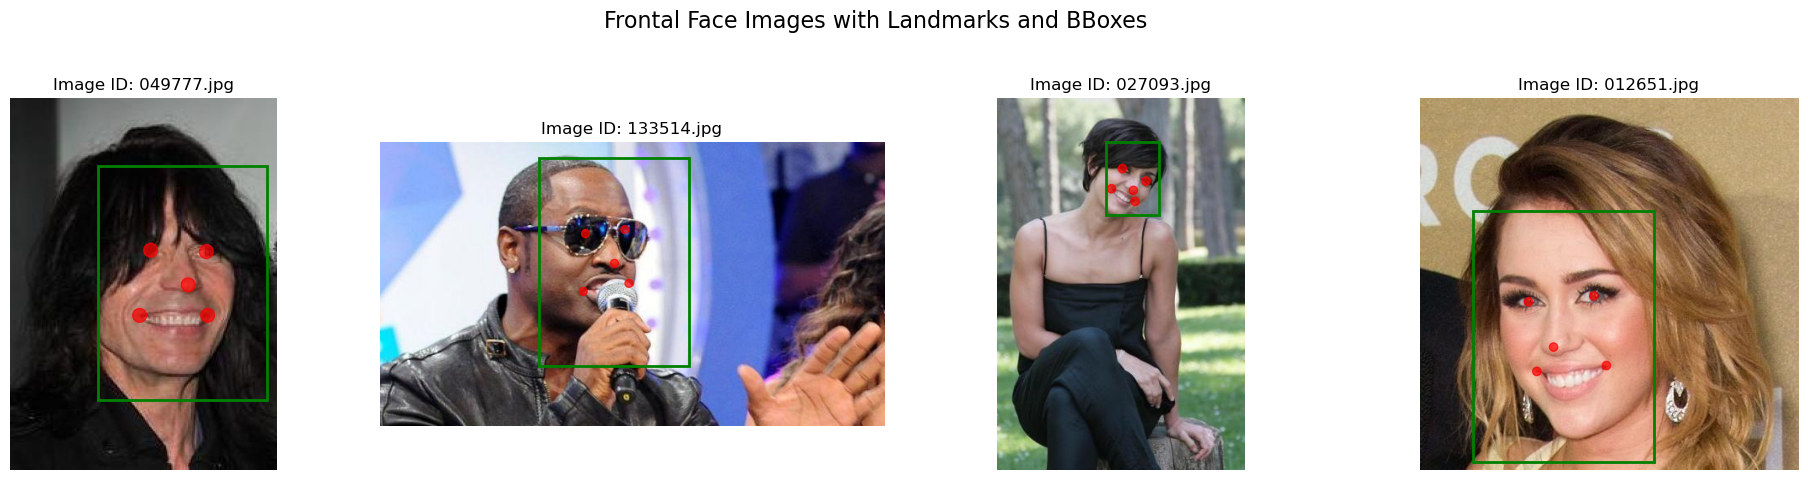

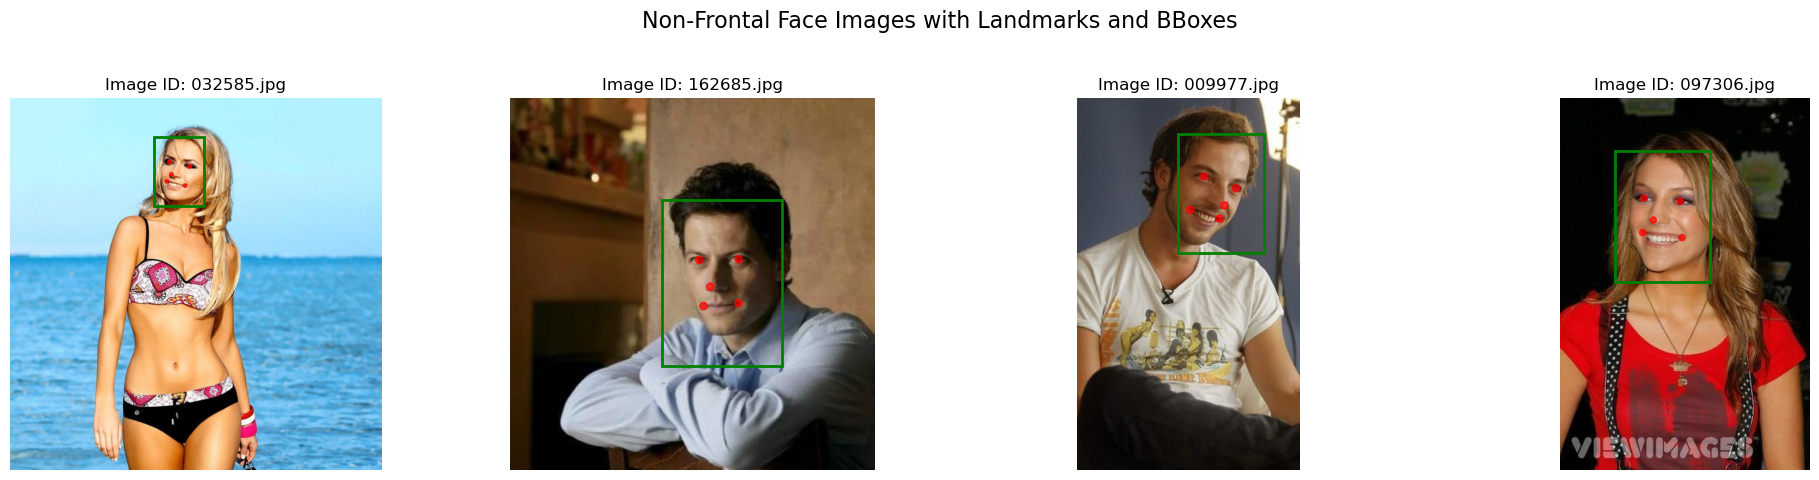

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

# Get non-frontal face image_ids
non_frontal_face_image_ids = landmarks[~(landmarks['is_horizontal_frontal'] & landmarks['is_vertical_frontal'])].index

# Select 4 random frontal and 4 random non-frontal image IDs
random_frontal_ids = random.sample(list(frontal_face_image_ids), 4)
random_non_frontal_ids = random.sample(list(non_frontal_face_image_ids), 4)

def draw_landmarks_on_image(image_id, ax):
    image_path = path_from_image_id(image_id)
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f"Image ID: {image_id}")
    ax.axis('off')

    # Get landmarks for the current image
    current_landmarks = landmarks.loc[image_id]

    # Plot landmarks
    landmark_coords = [
        (current_landmarks['lefteye_x'], current_landmarks['lefteye_y']),
        (current_landmarks['righteye_x'], current_landmarks['righteye_y']),
        (current_landmarks['nose_x'], current_landmarks['nose_y']),
        (current_landmarks['leftmouth_x'], current_landmarks['leftmouth_y']),
        (current_landmarks['rightmouth_x'], current_landmarks['rightmouth_y'])
    ]

    for x, y in landmark_coords:
        ax.add_patch(patches.Circle((x, y), radius=5, color='red', alpha=0.7))

    # Get bounding box coordinates
    bbox = bboxes.loc[image_id]
    x_1, y_1, width, height = bbox['x_1'], bbox['y_1'], bbox['width'], bbox['height']

    # Draw bounding box
    rect = patches.Rectangle((x_1, y_1), width, height, linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

# Create a figure with 1 row and 4 columns for frontal faces
fig_frontal, axes_frontal = plt.subplots(1, 4, figsize=(20, 5)) # Changed to 1 row, 4 columns
fig_frontal.suptitle('Frontal Face Images with Landmarks and BBoxes', fontsize=16)
for i, image_id in enumerate(random_frontal_ids):
    draw_landmarks_on_image(image_id, axes_frontal[i]) # Iterate directly over axes_frontal
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

# Create a figure with 1 row and 4 columns for non-frontal faces
fig_non_frontal, axes_non_frontal = plt.subplots(1, 4, figsize=(20, 5)) # Changed to 1 row, 4 columns
fig_non_frontal.suptitle('Non-Frontal Face Images with Landmarks and BBoxes', fontsize=16)
for i, image_id in enumerate(random_non_frontal_ids):
    draw_landmarks_on_image(image_id, axes_non_frontal[i]) # Iterate directly over axes_non_frontal
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()


In [ ]:
bboxes = pd.read_csv(f'{source_path}/list_bbox_celeba.csv', index_col='image_id')
bboxes.head()

,x_1,y_1,width,height
image_id,,,,
000001.jpg,95,71,226,313
000002.jpg,72,94,221,306
000003.jpg,216,59,91,126
000004.jpg,622,257,564,781
000005.jpg,236,109,120,166


In [ ]:
landmarks['avg_eye_x'] = (landmarks['lefteye_x'] + landmarks['righteye_x']) / 2
landmarks['avg_eye_y'] = (landmarks['lefteye_y'] + landmarks['righteye_y']) / 2

landmarks['avg_mouth_x'] = (landmarks['leftmouth_x'] + landmarks['rightmouth_x']) / 2
landmarks['avg_mouth_y'] = (landmarks['leftmouth_y'] + landmarks['rightmouth_y']) / 2

landmarks['face_center_x'] = (landmarks['avg_eye_x'] + landmarks['nose_x'] + landmarks['avg_mouth_x']) / 3
landmarks['face_center_y'] = (landmarks['avg_eye_y'] + landmarks['nose_y'] + landmarks['avg_mouth_y']) / 3

landmarks['face_width'] = landmarks[['righteye_x', 'rightmouth_x']].max(axis=1) - landmarks[['lefteye_x', 'leftmouth_x']].min(axis=1)
landmarks['face_height'] = landmarks['avg_mouth_y'] - landmarks['avg_eye_y']

landmarks.head()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,...,face_center_x,face_center_y,face_width,face_height,horizontal_nose_offset,nose_x_ratio,is_horizontal_frontal,vertical_nose_position_relative_to_eyes,nose_y_ratio,is_vertical_frontal
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,165,184,244,176,196,249,194,271,266,260,...,210.166667,231.500000,101,85.5,14.166667,0.140264,True,69.0,0.807018,True
000002.jpg,140,204,220,204,168,254,146,289,226,289,...,178.000000,249.000000,86,85.0,10.000000,0.116279,True,50.0,0.588235,True
000003.jpg,244,104,264,105,263,121,235,134,251,140,...,253.333333,120.833333,29,32.5,9.666667,0.333333,False,16.5,0.507692,True
000004.jpg,796,539,984,539,930,687,762,756,915,756,...,886.166667,660.666667,222,217.0,43.833333,0.197447,False,148.0,0.682028,True
000005.jpg,273,169,328,161,298,172,283,208,323,207,...,300.500000,181.500000,55,42.5,2.500000,0.045455,True,7.0,0.164706,False


In [ ]:
def is_within_bbox(image_id):
    # Retrieve bounding box coordinates
    bbox = bboxes.loc[image_id]
    x_1, y_1, width, height = bbox['x_1'], bbox['y_1'], bbox['width'], bbox['height']
    bbox_x_max = x_1 + width
    bbox_y_max = y_1 + height

    # Retrieve landmark coordinates
    lms = landmarks.loc[image_id]
    landmark_coords = [
        (lms['lefteye_x'], lms['lefteye_y']),
        (lms['righteye_x'], lms['righteye_y']),
        (lms['nose_x'], lms['nose_y']),
        (lms['leftmouth_x'], lms['leftmouth_y']),
        (lms['rightmouth_x'], lms['rightmouth_y'])
    ]

    # Check if all landmarks are within the bounding box
    for lx, ly in landmark_coords:
        if not (x_1 <= lx <= bbox_x_max and y_1 <= ly <= bbox_y_max):
            return False
    return True

# Apply the function to frontal_face_image_ids
frontal_face_image_ids_bbox_compliant = [image_id for image_id in frontal_face_image_ids if is_within_bbox(image_id)]

print(f"Number of frontal face images identified after bbox compliance filter: {len(frontal_face_image_ids_bbox_compliant)}")
print("First 5 frontal face image IDs after bbox compliance filter:")
print(frontal_face_image_ids_bbox_compliant[:5])

Number of frontal face images identified after bbox compliance filter: 167510
First 5 frontal face image IDs after bbox compliance filter:
['000001.jpg', '000002.jpg', '000006.jpg', '000007.jpg', '000008.jpg']


In [ ]:
# Identify image_ids that were filtered out by the bounding box compliance
discarded_image_ids = set(frontal_face_image_ids) - set(frontal_face_image_ids_bbox_compliant)

print(f"Number of images discarded due to bounding box non-compliance: {len(discarded_image_ids)}")
print("First 5 discarded image IDs:")


Number of images discarded due to bounding box non-compliance: 313
First 5 discarded image IDs:


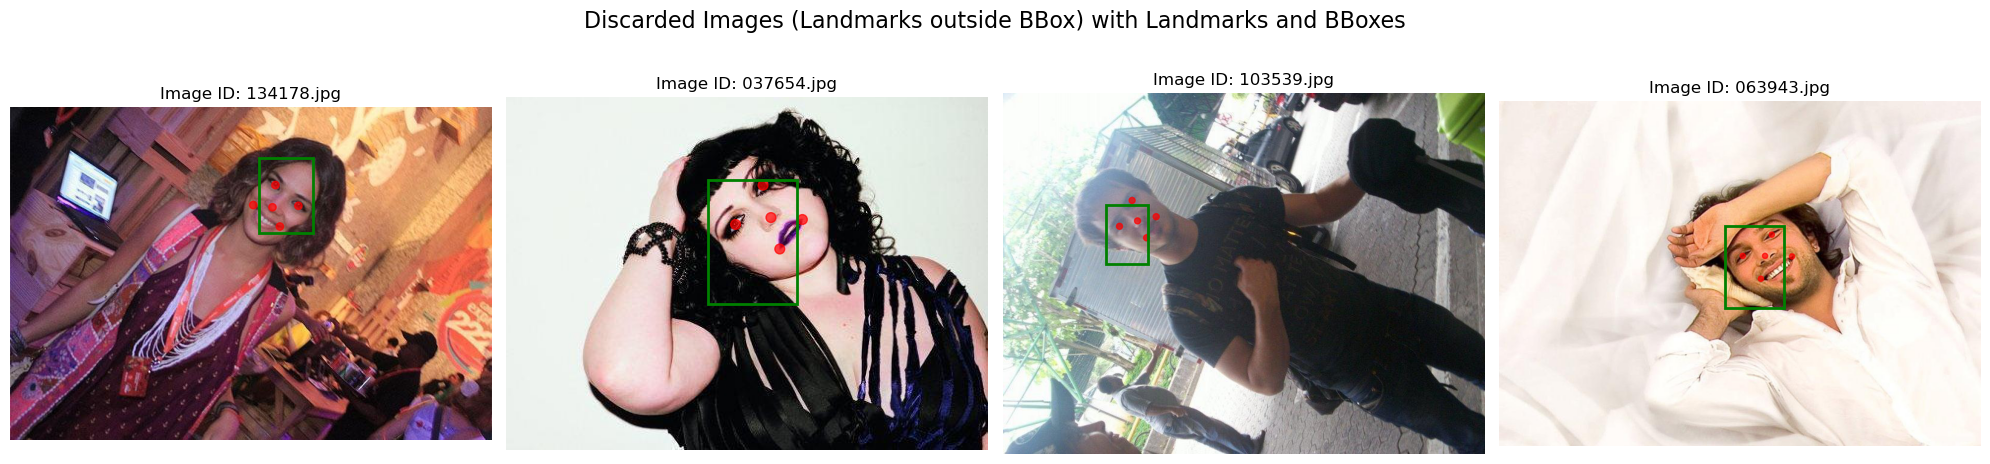

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

# Select 4 random discarded image IDs
# Ensure there are enough discarded images to sample from
if len(discarded_image_ids) >= 4:
    random_discarded_ids = random.sample(list(discarded_image_ids), 4)
else:
    random_discarded_ids = list(discarded_image_ids)
    print(f"Warning: Only {len(discarded_image_ids)} images were discarded, displaying all of them.")

# The draw_landmarks_on_image function is already defined

# Create a figure with 1 row and 4 columns for discarded images
fig_discarded, axes_discarded = plt.subplots(1, len(random_discarded_ids), figsize=(20, 5))
fig_discarded.suptitle('Discarded Images (Landmarks outside BBox) with Landmarks and BBoxes', fontsize=16)

# Handle the case where there is only one image to display (axes_discarded will not be an array)
if len(random_discarded_ids) == 1:
    draw_landmarks_on_image(random_discarded_ids[0], axes_discarded)
else:
    for i, image_id in enumerate(random_discarded_ids):
        draw_landmarks_on_image(image_id, axes_discarded[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

In [ ]:
identity = pd.read_csv('PROJECT/FaceAlignment/identity.csv', index_col='image_id')
identity.head()

,person_id
image_id,
000001.jpg,2880
000002.jpg,2937
000003.jpg,8692
000004.jpg,5805
000005.jpg,9295


In [ ]:
identity = identity[identity.index.isin(frontal_face_image_ids_bbox_compliant)]
print(f"Number of entries in identity after filtering: {len(identity)}")
identity.head()

Number of entries in identity after filtering: 167510


,person_id
image_id,
000001.jpg,2880
000002.jpg,2937
000006.jpg,4153
000007.jpg,9040
000008.jpg,6369


In [ ]:
person_id_counts = identity['person_id'].value_counts()
person_id_counts = person_id_counts[person_id_counts >= 5]
print(person_id_counts)

person_id
4436    30
4999    30
4435    30
4068    30
1231    30
        ..
7808     5
5442     5
9213     5
3099     5
6554     5
Name: count, Length: 9063, dtype: int64


In [ ]:
import random

# Filter person_id_counts to get persons with 20+ images
person_id_counts_20plus = person_id_counts[person_id_counts >= 25]

# Get a list of person_ids that meet the 20+ image criteria
selected_person_ids = person_id_counts_20plus.index.tolist()

val_dataset = []
train_dataset = []

# Iterate through each selected person_id
for person_id in selected_person_ids:
    # Get all image_ids for the current person_id
    images_for_person = identity[identity['person_id'] == person_id].index.tolist()

    # Ensure there are at least 5 images for the person, though the filter already ensures this
    if len(images_for_person) >= 5:
        # Randomly select 5 images for the validation dataset
        val_images = random.sample(images_for_person, 5)
        val_dataset.extend(val_images)

        # The remaining images go to the training dataset
        train_images = [img for img in images_for_person if img not in val_images]
        train_dataset.extend(train_images)
    else:
        # This case should ideally not happen due to the person_id_counts_20plus filter
        # but as a fallback, if less than 5 images, put all in train set
        train_dataset.extend(images_for_person)

print(f"Number of person_ids with 25+ images: {len(selected_person_ids)}")
print(f"Total images in val_dataset: {len(val_dataset)}")
print(f"Total images in train_dataset: {len(train_dataset)}")

# Get person_id for each image in val_dataset
val_dataset = identity[identity.index.isin(val_dataset)]
print("\nIdentity for validation dataset (first 5):")
display(val_dataset.head())

# Get person_id for each image in train_dataset
train_dataset = identity[identity.index.isin(train_dataset)]
print("\nIdentity for training dataset (first 5):")
train_dataset.head()

Number of person_ids with 25+ images: 1874
Total images in val_dataset: 9370
Total images in train_dataset: 41038

Identity for validation dataset (first 5):


,person_id
image_id,
000002.jpg,2937
000046.jpg,6318
000065.jpg,3046
000093.jpg,7399
000105.jpg,1946



Identity for training dataset (first 5):


,person_id
image_id,
000001.jpg,2880
000007.jpg,9040
000008.jpg,6369
000010.jpg,612
000014.jpg,7081


In [ ]:
import random

# Identify person_ids that have 5+ images but were NOT selected for train/val datasets (which required 25+ images)
already_selected_person_ids_for_train_val = set(selected_person_ids)
candidate_test_person_ids = [
    pid for pid in person_id_counts.index
    if pid not in already_selected_person_ids_for_train_val
]

print(f"Number of candidate person_ids for test_dataset (5+ images, not in train/val): {len(candidate_test_person_ids)}")

# Select 1000 random person_ids from the candidates for the test_dataset
# Ensure there are enough candidates to sample 1000
num_persons_for_test = min(1000, len(candidate_test_person_ids))
selected_test_person_ids = random.sample(candidate_test_person_ids, num_persons_for_test)

test_dataset = []

# For each selected test person_id, get 5 random images
for person_id in selected_test_person_ids:
    images_for_person = identity[identity['person_id'] == person_id].index.tolist()
    # Ensure the person indeed has 5 or more images (as per the initial person_id_counts filter)
    if len(images_for_person) >= 5:
        test_images = random.sample(images_for_person, 5)
        test_dataset.extend(test_images)

print(f"Number of selected person_ids for test_dataset: {len(selected_test_person_ids)}")
print(f"Total images in test_dataset: {len(test_dataset)}")
test_dataset = identity[identity.index.isin(test_dataset)]
test_dataset.head()


Number of candidate person_ids for test_dataset (5+ images, not in train/val): 7189
Number of selected person_ids for test_dataset: 1000
Total images in test_dataset: 5000


,person_id
image_id,
000127.jpg,7018
000156.jpg,4269
000179.jpg,4258
000213.jpg,8587
000257.jpg,2018
